In [1]:
# Importing libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import warnings
warnings.filterwarnings('ignore')

# Step 0: Import libraries and Dataset

In [2]:
# Importing dataset
dataset = pd.read_csv('kaggle_diabetes.csv')

# Step 1: Descriptive Statistics

In [3]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(3009, 9)

In [5]:
# checking if the dataset has a balanced set of diabetic and non diabetc records
print (len(dataset[dataset['Outcome'] == 0]))
print (len(dataset[dataset['Outcome'] == 1]))



1816
1193


In [6]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3009 non-null   int64  
 1   Glucose                   3009 non-null   int64  
 2   BloodPressure             3009 non-null   int64  
 3   SkinThickness             3009 non-null   int64  
 4   Insulin                   3009 non-null   int64  
 5   BMI                       3009 non-null   float64
 6   DiabetesPedigreeFunction  3009 non-null   float64
 7   Age                       3009 non-null   int64  
 8   Outcome                   3009 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 211.7 KB


In [7]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,3009.0,3.817547,3.368583,0.000,1.000,3.000,6.000,17.0
Glucose,3009.0,122.626786,32.663581,0.000,100.000,119.000,144.000,200.0
BloodPressure,3009.0,69.210369,19.451144,0.000,64.000,72.000,80.000,122.0
SkinThickness,3009.0,20.950482,16.201581,0.000,0.000,23.000,33.000,110.0
Insulin,3009.0,81.696909,113.896261,0.000,0.000,37.000,132.000,846.0
BMI,3009.0,32.385577,8.025734,0.000,27.600,32.400,36.800,80.6
DiabetesPedigreeFunction,3009.0,0.482527,0.391227,0.008,0.245,0.381,0.637,12.0
Age,3009.0,33.465603,11.801307,12.000,24.000,29.000,41.000,81.0
Outcome,3009.0,0.396477,0.489247,0.000,0.000,0.000,1.000,1.0


In [8]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observations:
1. There are a total of 3010 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Step 2: Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

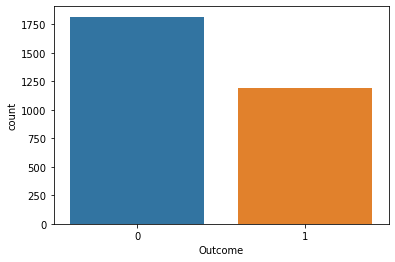

In [9]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

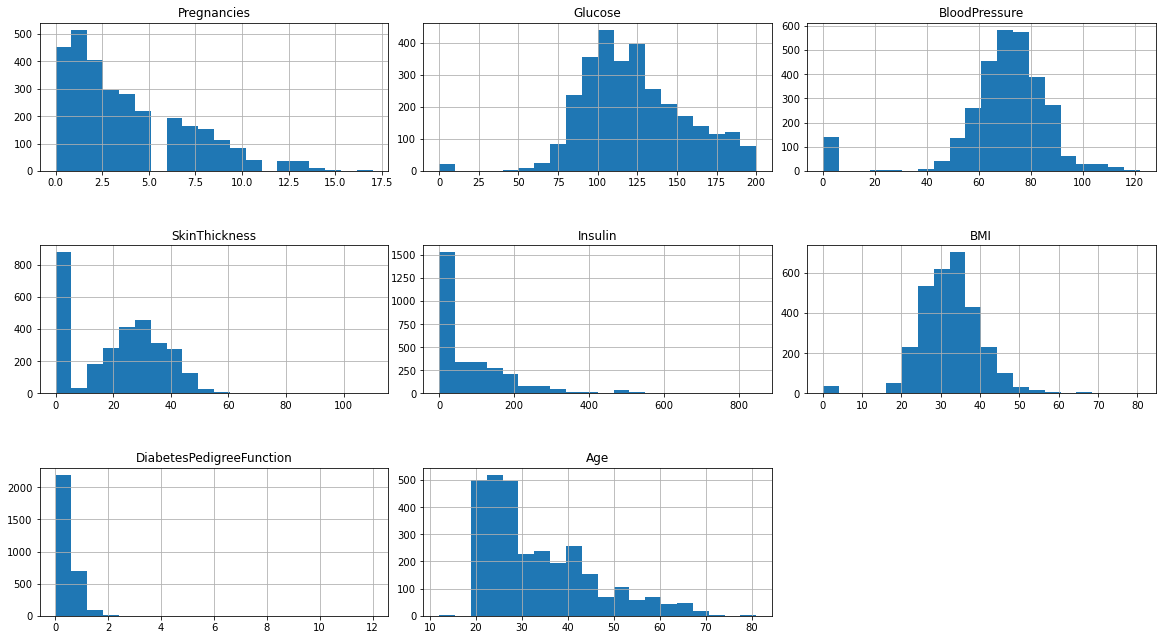

In [10]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

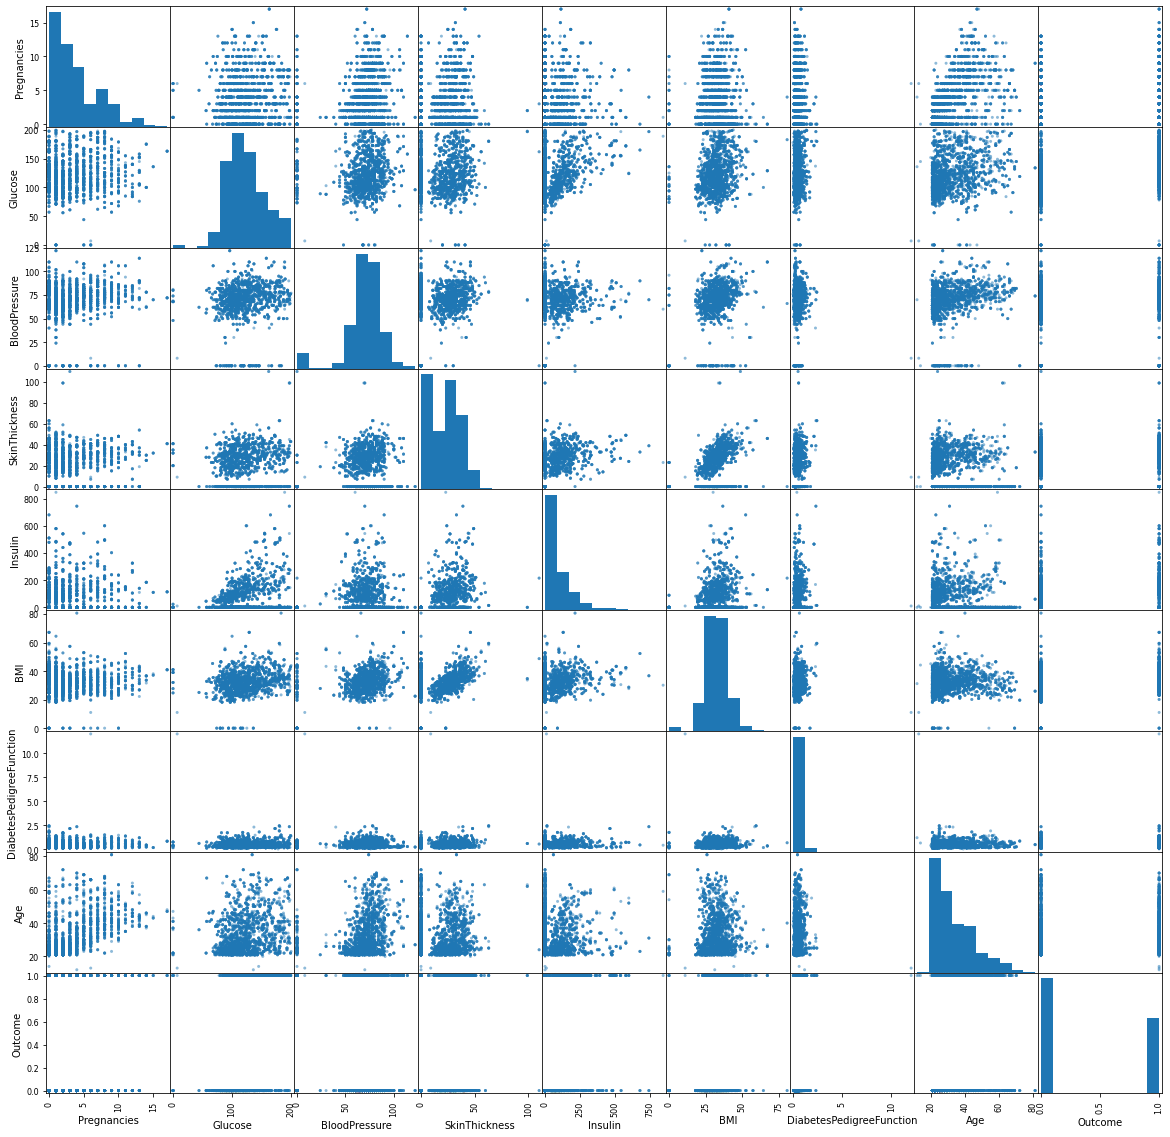

In [11]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
#from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

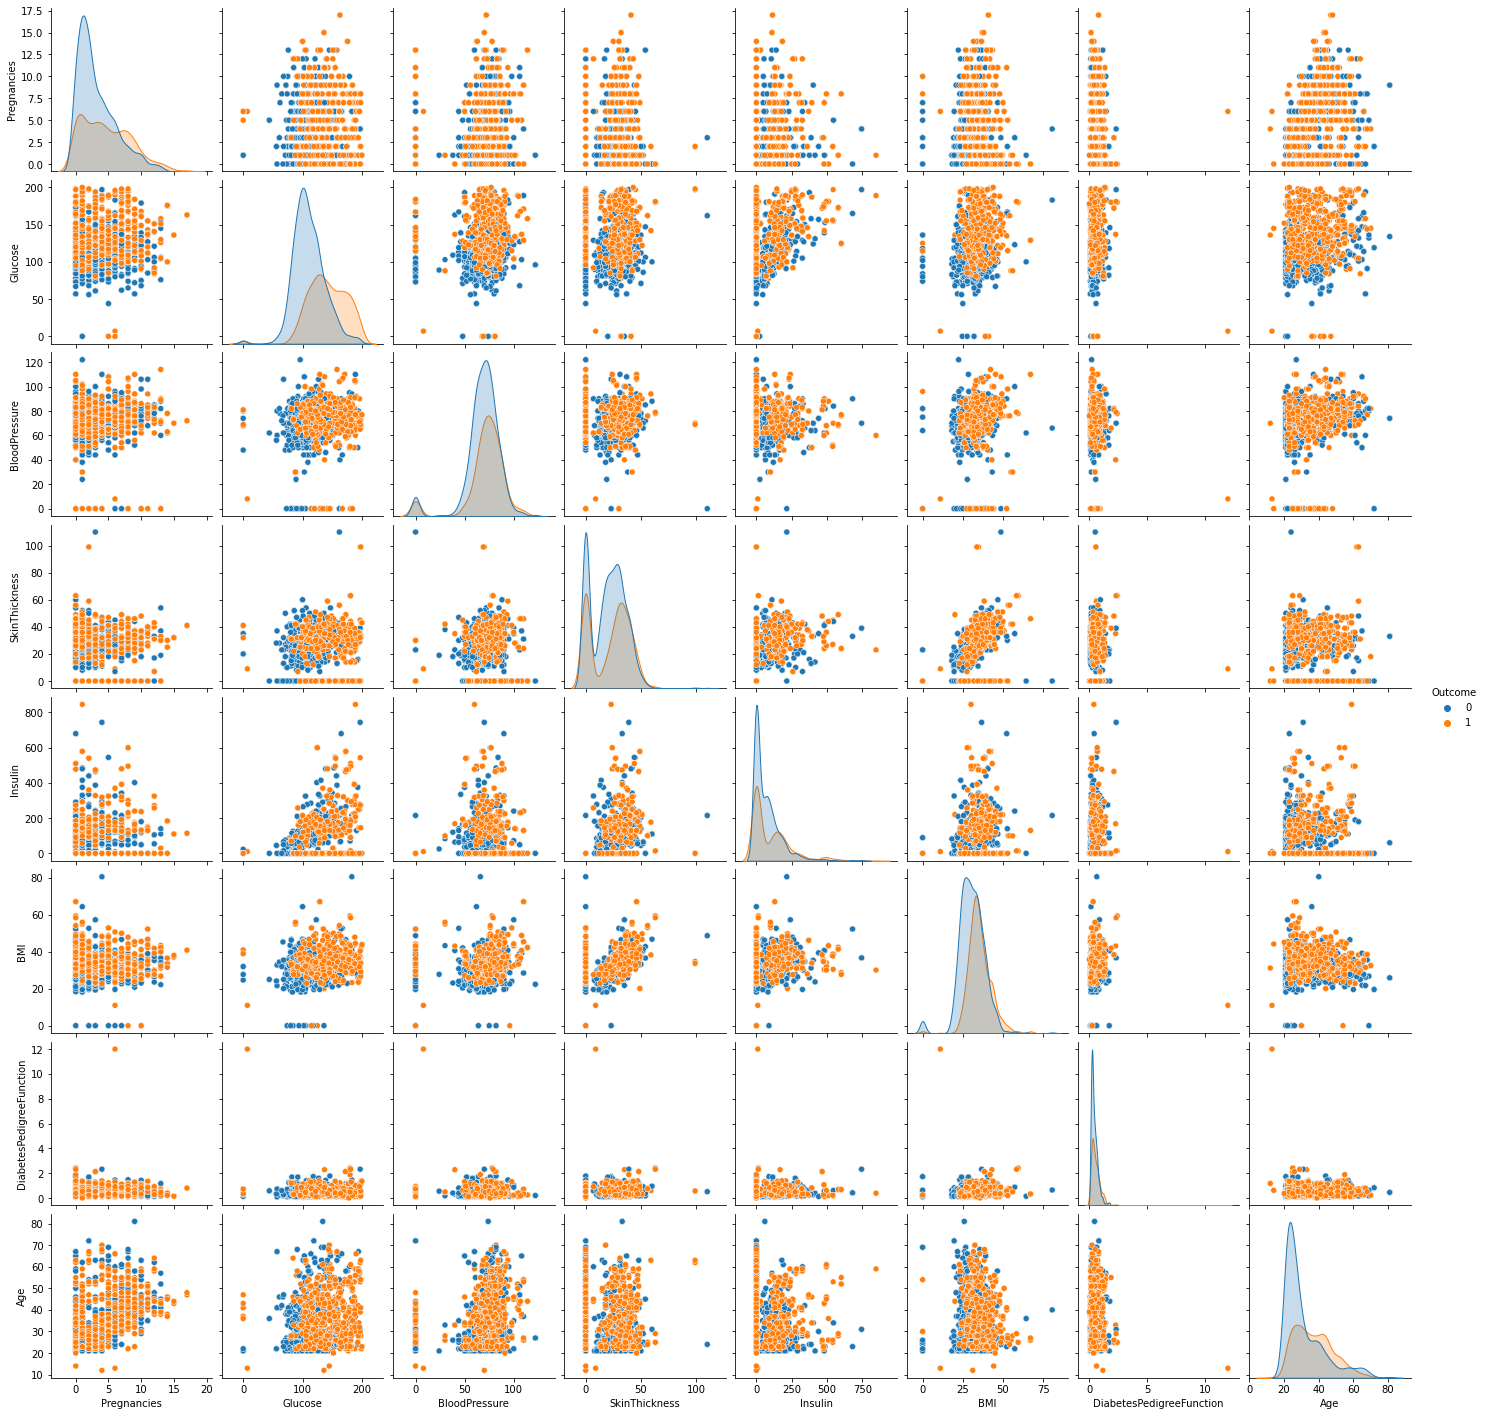

In [12]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

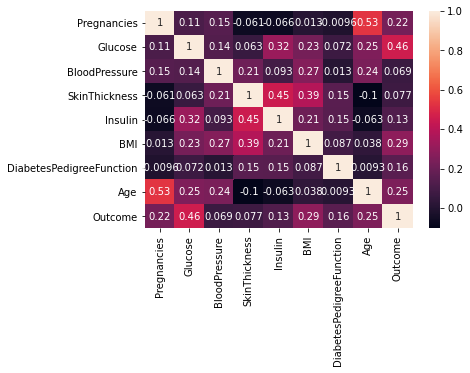

In [13]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

## Observations:
1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

# Step 3: Data Preprocessing

In [14]:
dataset_new = dataset

In [15]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [16]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                    0
Glucose                       21
BloodPressure                140
SkinThickness                877
Insulin                     1450
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [17]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [18]:
# Statistical summary of new dataset
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,3009.0,3.817547,3.368583,0.000,1.000,3.000000,6.000000,17.0
Glucose,3009.0,123.488621,31.003070,7.000,100.000,120.000000,144.000000,200.0
BloodPressure,3009.0,72.587661,12.021883,8.000,64.000,72.587661,80.000000,122.0
SkinThickness,3009.0,29.568480,9.048756,7.000,25.000,29.568480,33.000000,110.0
Insulin,3009.0,157.681847,82.234785,10.000,126.000,157.681847,157.681847,846.0
BMI,3009.0,32.810842,7.115853,11.000,27.700,32.500000,36.800000,80.6
DiabetesPedigreeFunction,3009.0,0.482527,0.391227,0.008,0.245,0.381000,0.637000,12.0
Age,3009.0,33.465603,11.801307,12.000,24.000,29.000000,41.000000,81.0
Outcome,3009.0,0.396477,0.489247,0.000,0.000,0.000000,1.000000,1.0


In [19]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [20]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [21]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset_scaled.iloc[:, 8].values

In [22]:
# Splitting X and Y into training and test sets
#The primary purpose of splitting into training and test sets is to verify how well would our model perform on unseen data, 
#train the model on training set and verify its performance on the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [23]:
#There are two main approaches to random resampling for imbalanced classification;
#they are oversampling and undersampling.

#Random Oversampling: Randomly duplicate examples in the minority class.
#Random Undersampling: Randomly delete examples in the majority class.

print("Before oversampling: ",Counter(Y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, Y_train_SMOTE = SMOTE.fit_resample(X_train, Y_train)

# summarize class distribution
print("After oversampling: ",Counter(Y_train_SMOTE))


In [24]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2407, 8)
X_test shape: (602, 8)
Y_train shape: (2407,)
Y_test shape: (602,)


# Step 4: Data Modelling

In [25]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

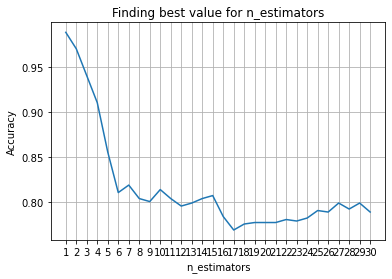

Highest value:  0.9883720930232558


In [26]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [27]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [28]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [30]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
# Random forest Algorithm
# We are approaching the Random Forest Algorithm here since it can be use for both regression and classification tasks
#Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method.
#The general idea of the bagging method is that a combination of learning models increases the overall result.
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [32]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [33]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [34]:
Y_pred_ranfor = ranfor.predict(X_train)

In [35]:
accuracy_ranfor = accuracy_score(Y_train, Y_pred_ranfor)

In [36]:
print("Random Forest: " + str(accuracy_ranfor * 100))

Random Forest: 99.95845450768591


In [37]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 75.08305647840533
K Nearest neighbors: 78.23920265780731
Support Vector Classifier: 74.4186046511628
Naive Bayes: 74.75083056478405
Decision tree: 99.00332225913621
Random Forest: 99.95845450768591


In [38]:
# Accuracy on test data set using Confusion matrix
#output will be a matrix with True Negative (TN) , False Positive (FP) , False Negative (FN) , True Positive (TP) values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[303,  60],
       [ 71, 168]], dtype=int64)

In [43]:
#Overall Accuracy calculation using confusion matrix
#(TP+TN)/total 

Accuracy=((303+168)/602)*100

print("Confusion matrix accuracy is", Accuracy)


Confusion Matrix accuracy is 78.23920265780731


In [55]:
#confusion matrix
#true positive rate
#(TP/(FN+TP))

True_Positive_Rate=round((168/(71+168)),2)

print("True Positive Rate is", True_Positive_Rate)

Ture Positive Rate is 0.7


In [56]:
#confusion matrix
#true negative rate
#(TN/(TN+FP))

True_Negative_Rate=round((303/(303+60)),2)

print("True Negative Rate is", True_Negative_Rate)

True Negative Rate is 0.83


<AxesSubplot:>

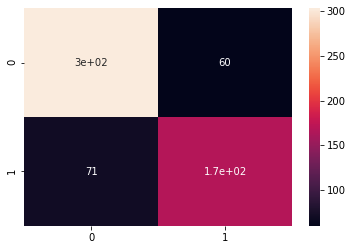

In [39]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [40]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       363
         1.0       0.74      0.70      0.72       239

    accuracy                           0.78       602
   macro avg       0.77      0.77      0.77       602
weighted avg       0.78      0.78      0.78       602



In [41]:
# Generating the pickle file primarily used in serializing and deserializing a Python object structure. In other words, it’s the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
# Advantage:Pickle is very useful for when you're working with machine learning algorithms, where you want to save them to be able to make new predictions at a later time, 
#without having to rewrite everything or train the model all over again
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(ranfor, open(filename, 'wb'))